In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-team-wise-performance20082017/matches.csv
/kaggle/input/ipl-team-wise-performance20082017/1.csv
/kaggle/input/ipl-team-wise-performance20082017/11.csv
/kaggle/input/ipl-team-wise-performance20082017/3.csv
/kaggle/input/ipl-team-wise-performance20082017/5.csv
/kaggle/input/ipl-team-wise-performance20082017/2.csv
/kaggle/input/ipl-team-wise-performance20082017/13.csv
/kaggle/input/ipl-team-wise-performance20082017/4.csv
/kaggle/input/ipl-team-wise-performance20082017/8.csv
/kaggle/input/ipl-team-wise-performance20082017/12.csv
/kaggle/input/ipl-team-wise-performance20082017/9.csv
/kaggle/input/ipl-team-wise-performance20082017/7.csv
/kaggle/input/ipl-team-wise-performance20082017/6.csv
/kaggle/input/ipl-team-wise-performance20082017/10.csv
/kaggle/input/ipl-cricket-dataset/matches.csv
/kaggle/input/ipl-cricket-dataset/deliveries.csv
/kaggle/input/ipl-cricket-dataset/matches1234.csv
/kaggle/input/ipl-cricket-dataset/Bowlers.csv


In [2]:
deliveries=pd.read_csv('/kaggle/input/ipl-cricket-dataset/deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# David Warner(Australian Batsman) performance

In [3]:
filt=deliveries['batsman']=='DA Warner'
warner=deliveries[filt]
warner.shape

(2902, 21)

<AxesSubplot:ylabel='dismissal_kind'>

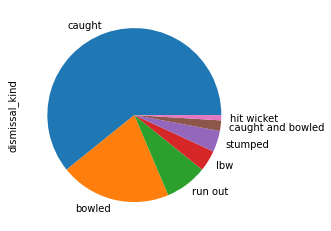

In [4]:
warner['dismissal_kind'].value_counts().plot.pie()

In [5]:
warner_fours=warner.loc[warner['batsman_runs']==4,['batsman','batsman_runs']]
len(warner_fours)

401

In [6]:
warner_six=warner.loc[warner['batsman_runs']==6,['batsman','batsman_runs']]
len(warner_six)

160

In [7]:
def count(df,runs):
    return len(df.loc[df['batsman_runs']==runs])*runs

In [8]:
count(warner,6)

960

In [9]:
count(warner,4)

1604

In [10]:
count(warner,1)

997

In [11]:
count(warner,2)

414

In [12]:
count(warner,3)

39

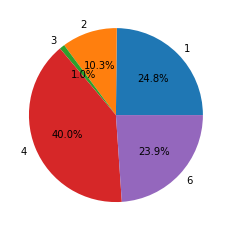

In [13]:
slices=[997,414,39,1604,960]
labels=[1,2,3,4,6]
plt.pie(slices,labels=labels,autopct='%1.1f%%');

# Score distribution for teams by innings

In [14]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [15]:
teams={'Royal Challengers Bangalore': 'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'}

In [16]:
deliveries['batting_team']=deliveries['batting_team'].map(teams)
deliveries['bowling_team']=deliveries['bowling_team'].map(teams)

In [17]:
runs=deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SRH,163
1282,636,1,SRH,208


In [18]:
innings1=runs.loc[runs['inning']==1]
innings2=runs.loc[runs['inning']==2]

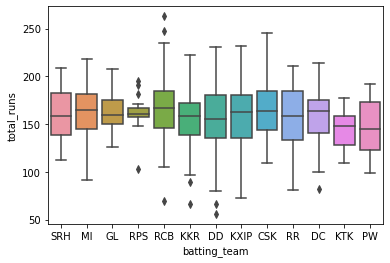

In [19]:
sns.boxplot(x='batting_team',y='total_runs',data=innings1);

# How many times teams scored more than 200

In [20]:
high_runs=deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_runs

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


In [21]:
runs_200=high_runs.loc[high_runs['total_runs']>=200]
runs_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


<AxesSubplot:xlabel='batting_team'>

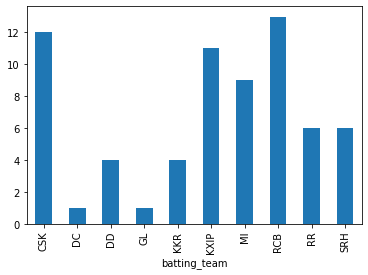

In [22]:
runs_200.groupby('batting_team')['total_runs'].count().plot.bar()

# Batsman comparison

In [23]:
runs=deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [24]:
balls=deliveries.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [25]:
fours=deliveries[deliveries['batsman_runs']==4]
fours

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,RCB,SRH,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,RCB,SRH,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,RCB,SRH,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,RCB,SRH,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [26]:
runs_4=fours.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [27]:
sixes=deliveries[deliveries['batsman_runs']==6]
sixes

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,RCB,SRH,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,RCB,SRH,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,RCB,SRH,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,RCB,SRH,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [28]:
runs_6=sixes.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1
...,...,...
296,Y Venugopal Rao,37
297,YK Pathan,149
298,YV Takawale,3
299,Yuvraj Singh,141


In [29]:
players=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
players

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,NaN
457,Yashpal Singh,47,67,NaN,NaN
458,Younis Khan,3,7,NaN,NaN
459,Yuvraj Singh,2591,2050,NaN,NaN


In [30]:
players.fillna(0,inplace=True)

In [31]:
players['strike_rate']=(players['batsman_runs']/players['ball'])*100
players

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,5.0,125.000000
4,A Flintoff,62,57,3.0,1.0,108.771930
...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033
457,Yashpal Singh,47,67,0.0,0.0,70.149254
458,Younis Khan,3,7,0.0,0.0,42.857143
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244


In [32]:
grp=deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


In [33]:
max_run=grp.groupby('batsman')['batsman_runs'].max().reset_index()
max_run.columns=['batsman','max_run']
max_run

,batsman,max_run
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


In [34]:
players2=pd.concat([players,max_run.iloc[:,1]],axis=1)
players2

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_run
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,5.0,125.000000,15
4,A Flintoff,62,57,3.0,1.0,108.771930,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033,45
457,Yashpal Singh,47,67,0.0,0.0,70.149254,20
458,Younis Khan,3,7,0.0,0.0,42.857143,3
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244,83


# Top 10 batsman

<AxesSubplot:xlabel='batsman'>

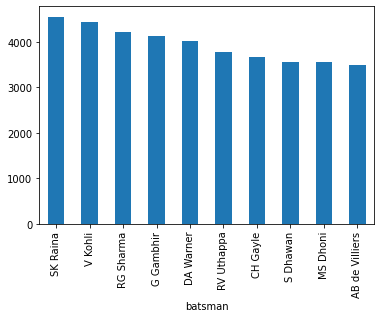

In [35]:
top10=deliveries.groupby('batsman')['batsman_runs'].sum()
top10.sort_values(ascending=False)[:10].plot.bar()

# Highest individual scores of Batsman

In [36]:
ind_score=(deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
           .sort_values('batsman_runs',ascending=False))
ind_score.head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


# Highest wicket takers

In [37]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [38]:
dismissal_kinds=['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [39]:
dismiss=deliveries.loc[deliveries['dismissal_kind'].isin(dismissal_kinds)]
dismiss

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150402,636,2,RCB,SRH,11,3,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,0,0,0,CH Gayle,caught,Bipul Sharma
150416,636,2,RCB,SRH,13,5,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
150422,636,2,RCB,SRH,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,0,0,0,AB de Villiers,caught,MC Henriques
150432,636,2,RCB,SRH,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,0,0,0,KL Rahul,bowled,NaN


<AxesSubplot:>

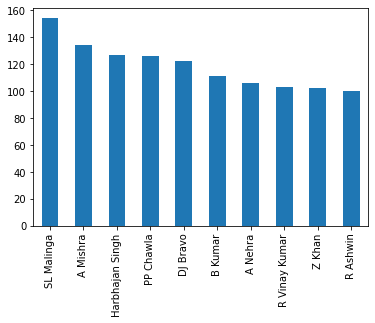

In [40]:
dismiss['bowler'].value_counts()[:10].plot.bar()

In [41]:
matches=pd.read_csv('/kaggle/input/ipl-team-wise-performance20082017/matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [42]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [43]:
matches.drop(['umpire3'],inplace=True,axis=1)

In [44]:
teams={'Royal Challengers Bangalore': 'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'}

In [45]:
matches['team1']=matches['team1'].map(teams)
matches['team2']=matches['team2'].map(teams)
matches['toss_winner']=matches['toss_winner'].map(teams)

In [46]:
# total matches played
matches.shape[0]

636

In [47]:
#Total cities in which matches were played
len(matches['city'].unique())

31

In [48]:
#Total teams participated
len(matches['team1'].unique())

13

In [49]:
# who got most man of the match awards
matches['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
                  ..
AD Mathews         1
LR Shukla          1
R Bhatia           1
A Singh            1
BCJ Cutting        1
Name: player_of_match, Length: 201, dtype: int64

In [50]:
# Maximum win by runs
win_run=matches['win_by_runs'].max()
matches[matches['win_by_runs']==win_run]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,5/6/2017,MI,DD,DD,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [51]:
# Highest win by wickets
win_wickets=matches['win_by_wickets'].max()
matches[matches['win_by_wickets']==win_wickets]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,4/30/2017,DD,KXIP,KXIP,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,4/27/2008,MI,DC,DC,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,4/19/2009,KXIP,DD,DD,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,3/18/2010,RR,RCB,RCB,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,5/20/2011,MI,RR,MI,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,5/20/2012,RR,MI,RR,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,4/10/2013,KXIP,CSK,CSK,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,4/26/2015,DD,RCB,RCB,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,4/21/2016,GL,SRH,SRH,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


<AxesSubplot:xlabel='season', ylabel='count'>

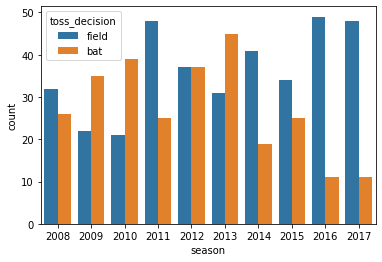

In [52]:
# Toss decisions across seasons
sns.countplot(x='season',hue='toss_decision',data=matches)

<AxesSubplot:>

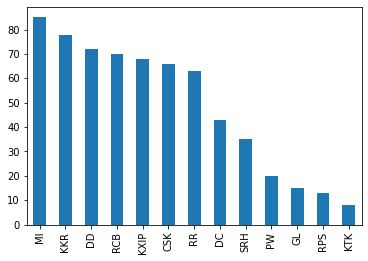

In [53]:
# Maximum toss winners
matches['toss_winner'].value_counts().plot.bar()

# Total matches played vs won by teams

In [54]:
teams={'Royal Challengers Bangalore': 'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'}

In [55]:
matches['winner']=matches['winner'].map(teams)

In [56]:
m1=matches['team1'].value_counts()
m2=matches['team2'].value_counts()
total_matches=(m1+m2).reset_index()
total_matches.columns=['team','no_of_matches']
total_matches

,team,no_of_matches
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KKR,148
5,KTK,14
6,KXIP,148
7,MI,157
8,PW,46
9,RCB,152


In [57]:
wins=matches['winner'].value_counts().reset_index()
wins.columns=['team','wins']
wins

,team,wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,RPS,15


In [58]:
m3=total_matches.merge(wins,on=['team'])
m3['% win']=(m3['wins']/m3['no_of_matches'])*100
m3

,team,no_of_matches,wins,% win
0,CSK,131,79,60.305344
1,DC,75,29,38.666667
2,DD,147,62,42.176871
3,GL,30,13,43.333333
4,KKR,148,77,52.027027
5,KTK,14,6,42.857143
6,KXIP,148,70,47.297297
7,MI,157,92,58.598726
8,PW,46,12,26.086957
9,RCB,152,73,48.026316


In [59]:
import plotly.offline as py
import plotly.graph_objs as go

In [60]:
trace1=go.Bar(x=m3['team'],y=m3['no_of_matches'],name='total matches')
trace2=go.Bar(x=m3['team'],y=m3['wins'],name='Matches win')

In [61]:
data=[trace1,trace2]
py.iplot(data)

# Matches played across each season

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='season', ylabel='count'>

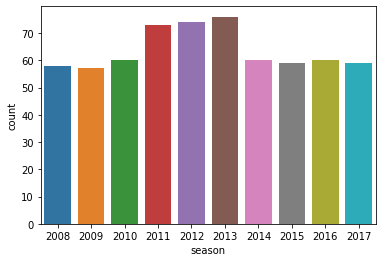

In [62]:
sns.countplot(matches['season'])

# Runs across each season

In [63]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


In [64]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [65]:
df=matches[['id','season']].merge(deliveries,how='left',left_on='id',right_on='match_id').drop('id',axis=1)
df

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,2016,636,2,RCB,SRH,20,2,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,2016,636,2,RCB,SRH,20,3,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,2016,636,2,RCB,SRH,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,2016,636,2,RCB,SRH,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,...,0,0,0,0,1,0,1,NaN,NaN,NaN


<AxesSubplot:xlabel='season'>

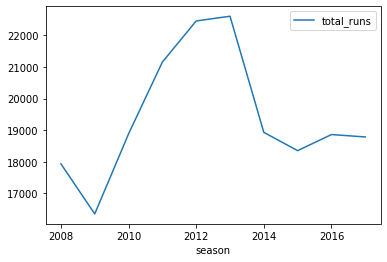

In [66]:
season=df.groupby('season')['total_runs'].sum().reset_index().set_index('season')
season.plot()

# Average runs per match in each season

In [67]:
season_runs=df.groupby('season')['total_runs'].sum().reset_index()
season_runs

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


In [68]:
season_matches=matches.groupby('season')['id'].count().reset_index()
season_matches.columns=['season','matches']
season_matches

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


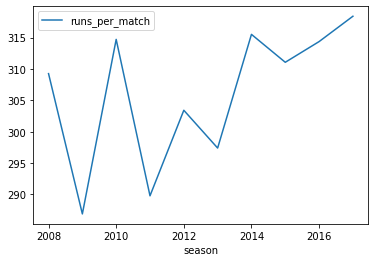

In [69]:
match_run_avg=pd.concat([season_matches,season_runs.iloc[:,1]],axis=1)
match_run_avg['runs_per_match']=match_run_avg['total_runs']/match_run_avg['matches']
match_run_avg.plot(x='season',y='runs_per_match');

# Most lucky grounds for teams

In [70]:
def lucky(df,team_name):
    return matches[matches['winner']==team_name]['venue'].value_counts().nlargest(5)

<AxesSubplot:>

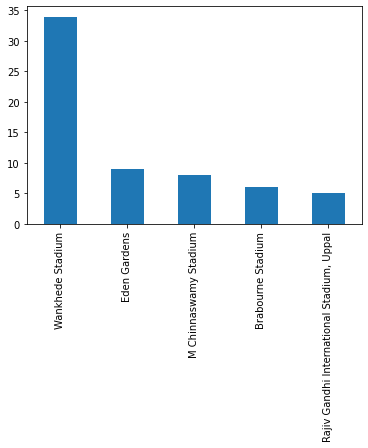

In [71]:
lucky(df,'MI').plot.bar()